In [1]:
### Cargamos las librerias necesarias

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

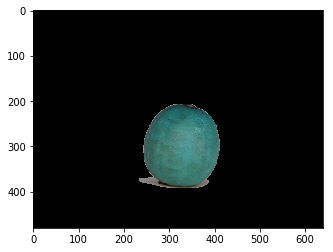

In [2]:
# Cambiamos la dirección del directorio de trabajo
os.chdir(r'C:\Users\caoti\Desktop\Lemon Images\Processed')

img = cv.imread('im0.png') # Cargamos la imagen para trabajar
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY) # Conversión a escala de grises
plt.imshow(img)
plt.show()

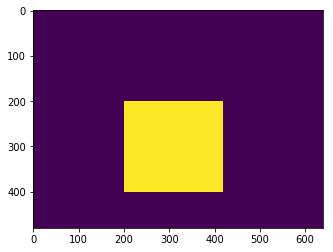

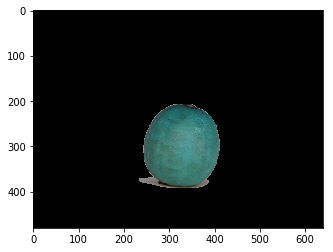

In [3]:
# Creamos una mascara para delimitar el área de trabajo
# La máscara está determinada al tanteo, no podría aplicar con todas las imágenes
mask = np.zeros(img.shape[:2], np.uint8)
mask[200:400, 200:420] = 255
masked = cv.bitwise_and(img, img, mask=mask)

plt.imshow(mask)
plt.show()
plt.imshow(masked)
plt.show()

# Obtenemos el histograma

Aquí me quedó duda si usar la imagen convertida a escala de grises; obtener un histograma para cada color (RGB); o trabajar en otro espacio de color como HSV o CIELab. 

En caso de HSV, según la literatura es un espacio muy parecido a la percepción humana del color. Por otra parte, CIELab es el color con el que se sugiere trabajar el análisis de imágenes para alimentos.

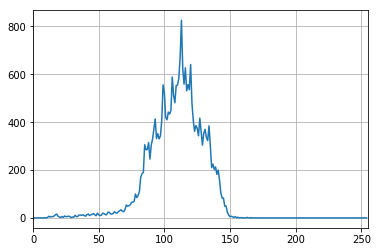

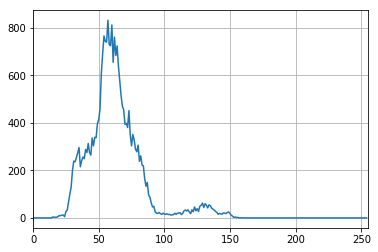

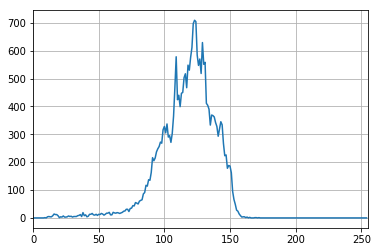

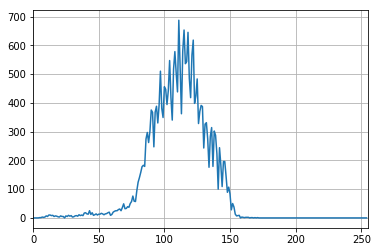

In [7]:
hist_full = cv.calcHist([gray],[0],None,[256],[0,256]) # Se calcula el histograma para la imagen en escala de grises
hist_mask = cv.calcHist([img],[1],mask,[256],[0,256])

hb = cv.calcHist([img],[0],mask,[256],[0,256]) # Histograma para el canal azul
hg = cv.calcHist([img],[1],mask,[256],[0,256]) # Histograma para el canal verde
hr = cv.calcHist([img],[2],mask,[256],[0,256]) # Histograma para el canal rojo

hist_list = [hist_full, hb, hg, hr] # Se crea una lista con los todos los histogramas

for h in hist_list:
    flag = h.tolist() # Se convierte el histograma en turno a una lista
    flag.pop(0) # Se quita el primer valor de la lista que corresponde a todos los píxeles en negro
    plt.plot(flag) # Se grafica de nuevo la lista
    plt.xlim(0,255) # Delimitación del espacio de la grafica en X
#     plt.ylim(0,750)
    plt.grid(True) # Activamos el mallado en la gráfica
    plt.show()

* En la primera gráfica se muestra el histograma completo para la imagen convertida a escala de grises
* La segunda gráfica corresponde al canal azul
* La tercera gráfica corresponde al canal verde
* La cuarta gráfica corresponde al canal rojo

In [8]:
# print(len(hist_mask))
# print(type(hist_mask))
# print(hist_mask)
# np.shape(new_img)
# print(new_img[0,0])

En la siguente celda se convierte el histograma obtenido de un array de numpy (np.array) a una lista de Python. Esto con la finalidad de facilitar la manipulación de los datos.

Un primer paso es eliminar todos los píxeles que corresponden al color negro (0). Me pregunto si sería conveniente eliminar tambien, los valores correspondientes al blanco (255); de esta forma se eliminarían los valores "extremos" y trabajar sólo con los valores "verdaderos" del color.

<class 'list'>


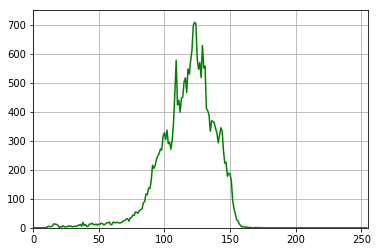

In [9]:
flag = hist_mask.tolist()
print(type(flag))

flag.pop(0)

plt.plot(flag,'g')
plt.xlim(0,255)
plt.ylim(0,750)
plt.grid(True)
plt.show()

In [10]:
flag.insert(0,[0.0])
# print(flag)
flag = np.array(flag)

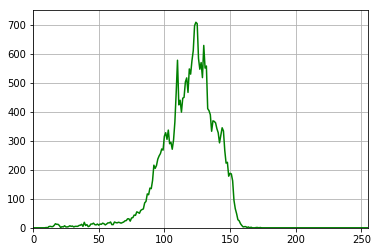

In [11]:
plt.plot(flag,'g')
plt.xlim(0,255)
plt.ylim(0,750)
plt.grid(True)
plt.show()

La gráfica es como se vería el histograma para el canal verde después de eliminar los valores en cero.
Los cambios a simple vista parecen imperceptibles, puesto que la mayor cantidad de datos se concentran en la parte central de la gráfica, aunque existen algunos valores entre 10 y 75 en el eje X.